# PyTorch Computer Vision

* see refrence notebook: https://github.com/mrdbourke/pytorch-deep-learning/blob/main/03_pytorch_computer_vision.ipynb
* see reference online book: https://www.learnpytorch.io/03_pytorch_computer_vision/
* [`torchvision`](https://www.learnpytorch.io/03_pytorch_computer_vision/)-base library for PyTorch computer vision
* `torchvision.datasets`- get datasets and data loading functions for computer vision here<br>
* `torchvision.models`- get pretrained computer vision models that you can leverage for your own problems
* `torchvision.transforms`- functions for manipulating your vision data(images) to be suitable for use with an ML model.
* `torch.utils.data.Dataset`- base dataset class for PyTorch.
* `torch.utils.data.Dataloader`- Creates a Python iterable over a dataset

In [ ]:
# import PyTorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# import matplotlib for visualization
import matplotlib.pyplot as plt

# Check versions
print(torch.__version__)
print(torchvision.__version__)

2.2.1+cu121
0.17.1+cu121


## 1. Getting a dataset

The dataset we'll be using is FashionMNIST from torchvision.datasets - https://pytorch.org/vision/stable/generated/torchvision.datasets.FashionMNIST.html#torchvision.datasets.FashionMNIST

In [ ]:
# setup training data
from torchvision import datasets
train_data = datasets.FashionMNIST(
    root = 'data', # where to download data to ?
    train = True, # Do we want the training datasets
    download = True, # Do we want to download yes/no ?
    transform = torchvision.transforms.ToTensor(),# convert the downloaded images into tensors i.e. how do we want to transform the data?
    target_transform = None#Do we want to transform the labels, i.e. how do we want to transform the labels/targets

)

test_data = datasets.FashionMNIST(
    root = 'data', # where to download data to ?
    train = False, # Do we want the training datasets
    download = True, # Do we want to download yes/no ?
    transform = ToTensor(),# convert the downloaded images into tensors i.e. how do we want to transform the data?
    target_transform = None#Do we want to transform the labels, i.e. how do we want to transform the labels/targets

)

100%|██████████| 26421880/26421880 [00:03<00:00, 8614564.13it/s] 


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 153842.47it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 2919615.99it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 19900716.12it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
len(train_data), len(test_data)

(60000, 10000)

In [ ]:
# See the first training example

image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
class_to_idx = train_data.class_to_idx

class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

## 1.1 Check input and output shapes of data

In [ ]:
# Check the shape of our image
print(f"Image shape:{image.shape}->[color_channels, height, width]")
print(f"Image label: {class_names[label]}")

Image shape:torch.Size([1, 28, 28])->[color_channels, height, width]
Image label: Ankle boot


## 1.2 Visualizing our data

Matplotlib does not work with GPU

Image shape: torch.Size([1, 28, 28])


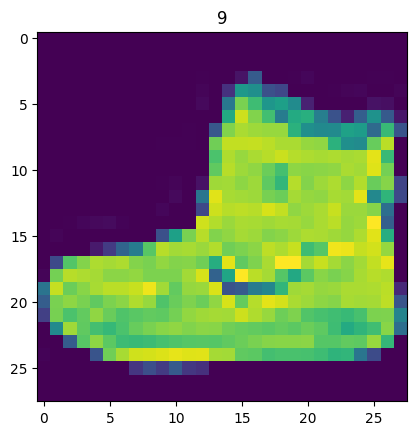

In [ ]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape: {image.shape}")

plt.imshow(image.squeeze())
plt.title(label);

(-0.5, 27.5, 27.5, -0.5)

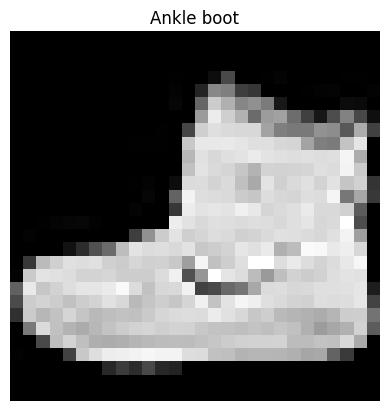

In [ ]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label]);

plt.axis(False)

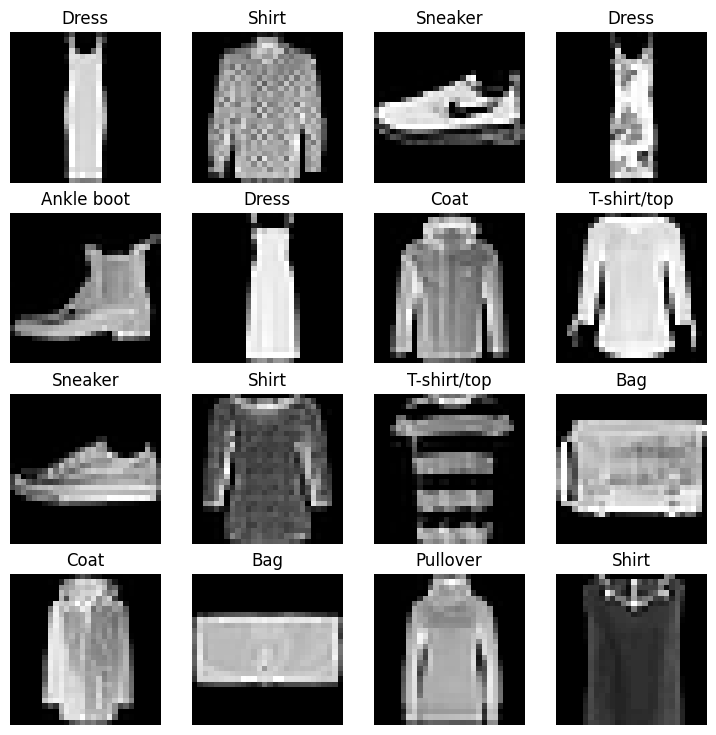

In [ ]:
#torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))

rows, cols = 4,4

for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols,i)
  #print(random_idx)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label]);
  plt.axis(False)



### Do you think these items of clothing (images) could be modelled with pure linear lines? or do you think we will need non-linearities?

In [ ]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

## 2. Prepare DataLoader

right now, our data is in the form of PyTorch Datasets.

DataLoader turns our dataset into a Python iterable.
More specifically, we want to turn our data into batches(or mini-batches).

Why would we do this ?

1. It is more computationally efficient, as in, your computing hardware may not be able to look(store in memory) at 60000 images in one hit. So we break it down to 32 images at a time(batch size of 32)<br>
2. It gives our neural network more chances to update its gradients per epoch.

In [ ]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables(batches)
train_dataloader = DataLoader(dataset = train_data,
                               batch_size =BATCH_SIZE,
                               shuffle = True)

test_dataloader = DataLoader(dataset = test_data,
                               batch_size =BATCH_SIZE,
                               shuffle = False)# for evaluation purpose there is no need to shuffle the data

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7840d12a0f70>,
 <torch.utils.data.dataloader.DataLoader at 0x7840d167afe0>)

In [ ]:
type(train_dataloader)

torch.utils.data.dataloader.DataLoader

Length of train_dataLoaders: 60000/32=1875 batches of 32 ...<br>
Length of test_dataLoaders: 10000/32=313 batches of 32 ...

In [ ]:
# Let's check out what we have created

print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"Length of train_dataLoaders: {len(train_dataloader)} batches of {BATCH_SIZE} ...")
print(f"Length of test_dataLoaders: {len(test_dataloader)} batches of {BATCH_SIZE} ...")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x7840d12a0f70>, <torch.utils.data.dataloader.DataLoader object at 0x7840d167afe0>)
Length of train_dataLoaders: 1875 batches of 32 ...
Length of test_dataLoaders: 313 batches of 32 ...


`iter(train_dataloader)`: This creates an iterator from the train_dataloader, allowing us to iterate over it. iter() is a Python built-in function that creates an iterator object from an iterable.<br>
`next(...)`: This function is used to get the next item from an iterator. In this case, it retrieves the next batch of data from the iterator created from the train_dataloader.<br>
`train_features_batch, train_labels_batch`: These variables store the features and labels of the batch retrieved from the iterator. The features batch (train_features_batch) contains the input data (often referred to as "features" or "inputs") for the training examples in the batch, and the labels batch (train_labels_batch) contains the corresponding labels or targets.

In [ ]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

`torch.randint(0, len(train_features_batch), size=[1]).item()`: This line generates a random integer index to select a sample from the training dataset.<br>
  * `torch.randint()`: generates random integers within a specified range. Here, it generates an integer between 0 (inclusive) and the length of the training features batch `(len(train_features_batch))` exclusive.
  * `size=[1]`: specifies that a single random integer should be generated.
  * `.item()`: extracts the generated random integer value from the resulting PyTorch tensor, converting it to a Python integer.<br>

`train_features_batch[random_idx]` and `train_labels_batch[random_idx]`: These lines select a sample (an image and its corresponding label) from the training dataset using the random index generated in the previous step.<br>
  * `train_features_batch[random_idx]` selects the image data corresponding to the randomly chosen index from the training features batch.
  * `train_labels_batch[random_idx]` selects the label corresponding to the randomly chosen index from the training labels batch.


Image size: torch.Size([1, 28, 28])
Label: 4, label size: torch.Size([])


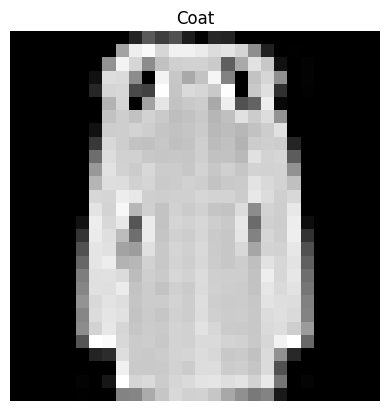

In [ ]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
#print(random_idx)
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

## 3. Model 0: Build a baseline model

When starting to build a series of machine learning modelling experiments, it's best practice to start with a baseline model.

A baseline model is a simple model you will try and improve upon with subsequent
models/experiments.

In other words: start simply and add complexity when necessary.

In [ ]:
# Create a flatten layer
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x) # perform forward pass

# Print out what happened
print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]")

Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width]


In [ ]:
output.squeeze().shape

torch.Size([784])

In [ ]:
from torch import nn

class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape:int,
               hidden_units:int,
               output_shape: int):
    super().__init__()
    self.layer_stack= nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features = hidden_units),
        nn.Linear(in_features=hidden_units,
                  out_features = output_shape),

    )

  def forward(self,x):
    return self.layer_stack(x)

In [ ]:
torch.manual_seed(42)

# Setup model with input parameters
model_0 = FashionMNISTModelV0(
    input_shape = 784, # this is 28*28
    hidden_units = 10, # how many units in the hidden layer
    output_shape = len(class_names) # one for every class
    ).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
dummy_x = torch.rand([1,1,28,28])
model_0(dummy_x)
model_0(dummy_x).shape

torch.Size([1, 10])

In [ ]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

### 3.1 Setup loss, optimizer and evaluation metrics

* Loss function - since we are working with multi-class data, our loss function will be `nn.CrossEntropyLoss()`

* Optimizer - out optimizer `torch.optim.SGD()`(stochastic gradient descent)
* Evaluation metric -  since we are working on a classification problem, let's use accuracy as our evaluation metric.

In [ ]:
# Calculate accuracy (a classification metric)
"""
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100
    return acc

"""

'\ndef accuracy_fn(y_true, y_pred):\n    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal\n    acc = (correct / len(y_pred)) * 100\n    return acc\n\n'

In [ ]:
import requests
from pathlib import Path
# Download helper functions from Learn PyTorch repo (if it's not already downloaded)

if Path("helper_function.py").is_file():
  print("helper_function.py already exists, skipping download")

else:
  print("Download helper_function.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_function.py", "wb") as f:
    f.write(request.content)
# Import accuracy_fn
from helper_function import accuracy_fn,plot_predictions, plot_decision_boundary

Download helper_function.py


In [ ]:
# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)


### 3.2 Creating a function to time our experiments

Machine learning is very experimental.

Two of the main things you will often want to track are:
1. Model's performance(loss and accuracy values etc)
2. How fast it runs.

In [ ]:
from timeit import default_timer as timer

def print_train_time(start: float,
                     end:float,
                     device: torch.device=None):
  """Prints difference between start and end time."""
  total_time = end-start
  print(f"Train time on{device}: {total_time:.3f} seconds")
  return total_time


In [ ]:
start_time = timer()
#some code...
end_time=timer()
print_train_time(start=start_time,
                 end = end_time,
                 device="cpu")


Train time oncpu: 0.000 seconds


4.6701000030680007e-05

In [ ]:
# UPTOHERE: 3.3 Creating a training loop and training a model on batches of data...
# Highlight that the optimizer will update a model's parameters once per batch than once per epoch...

### 3.3 Creating a training loop and training a model on batches

1. Loop through epochs.
2. Loop through training batches, perform training steps, calculate the train loss *per batch*.
3. Loop through testing batches, perform testing steps, calculate the test loss *per batch*.
4. Printout what's happening.
5. Time it all(for fun).

Google colab also provide tqdm. we are going to use tqdm.auto.
tqdm.auto i sjust going to recognize what compute environment we are using and it's going to give us the best type of progress bar for what we are doing. So for example if google colab is running jupyter notebook behind  the scenes. So the progress bar for the jupyter notebooks is a little bit different to python scripts.

In [ ]:
# Import tqdm for progress bar

from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs (We will keep this small for faster training time)
epochs=3

# Create training and test loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch} \n -----")
  ### Training
  train_loss=0
  # Add a loop to loop through the training batches
  # X---> image, y--->label
  for batch, (X,y) in enumerate(train_dataloader):
    model_0.train()
    # 1. Forward pass
    y_pred= model_0(X)

    # 2. Calculate the loss (per batch)
    loss = loss_fn(y_pred, y)
    train_loss+=loss  # accumulate train loss

    # 3. Zero the gradients of the optimizer
    optimizer.zero_grad()

    # 4. Loss backward or perform backpropagation
    loss.backward()

    # 5. Progress/step the optimizer step
    optimizer.step()

    # Print out what's happening
    if batch%400 ==0:
      print(f"Looked at {batch*len(X)}/{len(train_dataloader.dataset)} samples.")

  # Divide total train loss by length of train dataloader
  train_loss /=len(train_dataloader)


  ### Testing
  test_loss, test_acc = 0,0
  model_0.eval()

  with torch.inference_mode():
    for X_test,y_test in test_dataloader:
      # 1. Forward Pass
      test_pred = model_0(X_test)

      # 2. Calculate the loss(accumulatively)
      test_loss += loss_fn(test_pred, y_test)

      # 3. Calculate accuracy
      test_acc += accuracy_fn(y_true= y_test, y_pred= test_pred.argmax(dim=1))
      #why we do this? well because recall that the outputs of our model, the raw outputs of our model are going to be logits and our accuracy
      #function expects our true labels and our predictions to be in the same format, if our test_pred is just logits we have to call argmax to find the logit value with
      #the heighest index and that will be the prediction label and so then we are comparing labels. so that's what argmax does here.

    #calculate the test loss average per batch
    test_loss /= len(test_dataloader)

    # Calculate the test accuracy average per batch
    test_acc /= len(test_dataloader)

  # Printout what's Happening
  print(f"\n Train loss: {train_loss:.4f} | Test loss: {test_loss:.4f}, Test acc:{test_acc:.4f}")

# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 =print_train_time(start=  train_time_start_on_cpu,
                                           end=train_time_end_on_cpu,
                                           device = str(next(model_0.parameters()).device))



  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0 
 -----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

 Train loss: 0.5904 | Test loss: 0.5095, Test acc:82.0387
Epoch: 1 
 -----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

 Train loss: 0.4763 | Test loss: 0.4799, Test acc:83.1969
Epoch: 2 
 -----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

 Train loss: 0.4550 | Test loss: 0.4766, Test acc:83.4265
Train time oncpu: 28.866 seconds


In [ ]:
str(next(model_0.parameters()).device)

'cpu'

## 4. Make predictions and get Model 0 results

In [ ]:
torch.manual_seed(42)

def eval_model(model:torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  """ Returns a disctionary containing the results of model predicting on data_loader."""

  loss, acc = 0,0

  model.eval()

  with torch.inference_mode():
    for X,y in tqdm(data_loader):
      #Make predictions
      y_pred = model(X)

      # Accumulate the loss and acc values per batch

      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true = y,
                         y_pred = y_pred.argmax(dim=1))

    # Scale loss and acc to find the average loss/acc per batch
    loss/=len(data_loader)
    acc/=len(data_loader)

  return {"model_name": model.__class__.__name__, #only works when model was created with a class
          "model_loss": loss.item(),
          "model_acc": acc}

# Calculate model 0 results on test dataset

model_0_results = eval_model(model=model_0,
                             data_loader = test_dataloader,
                             loss_fn = loss_fn,
                             accuracy_fn = accuracy_fn)

model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663888335227966,
 'model_acc': 83.42651757188499}

## 5. Setup device agnostic-code(for using a GPU if there is one)

In [ ]:
!nvidia-smi

Thu May  2 16:35:29 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P8              12W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
torch.cuda.is_available()

True

In [ ]:
# Setup device-agnostic code
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## 6. Model 1: Building a better model with non-linearity

we learned about the power of non-linearity in notebook 02: https://www.learnpytorch.io/02_pytorch_classification/#6-the-missing-piece-non-linearity

In [ ]:
# Create a model with non-linear and linear layers

class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape:int,
               hidden_units:int,
               output_shape: int):
    super().__init__()
    self.layer_stack= nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features = hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,
                  out_features = output_shape),
        nn.ReLU()
    )

  def forward(self,x: torch.Tensor):
    return self.layer_stack(x)


In [ ]:
next(model_0.parameters()).device

device(type='cpu')

In [ ]:
# Create an instance of model_1
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(
    input_shape = 784, # this is 28*28
    hidden_units = 10, # how many units in the hidden layer
    output_shape = len(class_names) # one for every class
    ).to(device) # Send to the GPU if it's available


next(model_1.parameters()).device

device(type='cuda', index=0)

### 6.1 Setup loss, optimizer and evaluation metrics

In [ ]:
from helper_function import accuracy_fn
loss_fn = nn.CrossEntropyLoss() # measure how wrong our model is
optimizer = torch.optim.SGD(params=model_1.parameters(), #tries to update our model's parameters to reduce the loss
                            lr=0.1)

### 6.2 Functionizing training and evaluation/testing loops.

Let's create a function for:
  * training loop - `train_step()`
  * testing loop- `test_step()`

In [ ]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device=device):
  """Performs a training with model trying to learn on data loader"""
  ### Training
  train_loss, train_acc = 0, 0
  model.to(device)

  # Put model into training mode
  model.train()
  # Add a loop to loop through the training batches
  # X---> image, y--->label
  for batch, (X,y) in enumerate(data_loader):
    # Send data to GPU
    X, y = X.to(device), y.to(device)

    # 1. Forward pass(outputs the raw logits from the model)
    y_pred= model(X)

    # 2. Calculate the loss (per batch)
    loss = loss_fn(y_pred, y)
    train_loss+=loss  # accumulate train loss
    train_acc += accuracy_fn(y_true=y,
                             y_pred = y_pred.argmax(dim=1))# go from logits -> prediction labels

    # 3. Zero the gradients of the optimizer
    optimizer.zero_grad()

    # 4. Loss backward or perform backpropagation
    loss.backward()

    # 5. Progress/step the optimizer step
    optimizer.step()



  # Divide total train loss by length of train dataloader
  train_loss /=len(data_loader)
  train_acc /=len(data_loader)
  print(f"Train loss: {train_loss:.5f}| Train acc:{train_acc:.2f}%")



In [ ]:
def test_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device=device):
  """ Performs a testing loop step on model going over data_loader."""

  ### Testing
  test_loss, test_acc = 0,0
  #put the model in eval mode
  model.eval()

  with torch.inference_mode():
    # X->X_test, y->y_test
    for X,y in data_loader:
      # Send the data to the target device
      X,y = X.to(device), y.to(device)

      # 1. Forward Pass
      test_pred = model(X)

      # 2. Calculate the loss(accumulatively)
      test_loss += loss_fn(test_pred, y)

      # 3. Calculate accuracy
      test_acc += accuracy_fn(y_true= y, y_pred= test_pred.argmax(dim=1))
      #why we do this? well because recall that the outputs of our model, the raw outputs of our model are going to be logits and our accuracy
      #function expects our true labels and our predictions to be in the same format, if our test_pred is just logits we have to call argmax to find the logit value with
      #the heighest index and that will be the prediction label and so then we are comparing labels. so that's what argmax does here.

    #adjust the metrics and print out
    #calculate the test loss average per batch
    test_loss /= len(data_loader)

    # Calculate the test accuracy average per batch
    test_acc /= len(data_loader)
    # Printout what's Happening
    print(f"\n Test loss: {test_loss:.5f}| Test acc:{test_acc:.2f}% \n")






In [ ]:
torch.manual_seed(42)

#Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

# Set epochs
epochs = 3

# Create a optimization and evaluation loop using train_step() and test_step()
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n --------")
  train_step(model= model_1,
               data_loader = train_dataloader,
               loss_fn = loss_fn,
               optimizer = optimizer,
               accuracy_fn = accuracy_fn,
               device = device)

  test_step(model = model_1,
            data_loader=test_dataloader,
            loss_fn = loss_fn,
            accuracy_fn = accuracy_fn,
            device = device)

train_time_end_on_gpu = timer()

total_train_time_model_1 =print_train_time(start=  train_time_start_on_gpu,
                                           end=train_time_end_on_gpu,
                                           device = device)



  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
 --------
Train loss: 1.09199| Train acc:61.34%

 Test loss: 0.95636| Test acc:65.00% 

Epoch: 1
 --------
Train loss: 0.78101| Train acc:71.93%

 Test loss: 0.72227| Test acc:73.91% 

Epoch: 2
 --------
Train loss: 0.67027| Train acc:75.94%

 Test loss: 0.68500| Test acc:75.02% 

Train time oncuda: 31.045 seconds


>**Note:** Sometimes, depending on your data/hardware you might find that your model trains faster on CPU than GPU.
>
> Why is this?
>
> 1. It could be that the overhead for copying data/model to and from the GPU
outweighs the compute benifits offered by the GPU.
> 2. The hardware you are using has a better CPU in terms compute capability than the GPU.
>
> For more on how to make your model compute faster, see here: https://horace.io/brrr_intro.html

In [ ]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663888335227966,
 'model_acc': 83.42651757188499}

In [ ]:
# Train time on CPU
total_train_time_model_0

28.86629572800001

In [ ]:
total_train_time_model_1

31.045412424999995

In [ ]:
torch.manual_seed(42)

def eval_model(model:torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device=device):
  """ Returns a disctionary containing the results of model predicting on data_loader."""

  loss, acc = 0,0

  model.eval()

  with torch.inference_mode():
    for X,y in tqdm(data_loader):
      # Send the data to the target device , i.e make our data device agnostic
      X,y = X.to(device), y.to(device)
      #Make predictions
      y_pred = model(X)

      # Accumulate the loss and acc values per batch

      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true = y,
                         y_pred = y_pred.argmax(dim=1))

    # Scale loss and acc to find the average loss/acc per batch
    loss/=len(data_loader)
    acc/=len(data_loader)

  return {"model_name": model.__class__.__name__, #only works when model was created with a class
          "model_loss": loss.item(),
          "model_acc": acc}


In [ ]:
# Get model_1 results dictionary
model_1_results = eval_model(model=model_1,
                             data_loader = test_dataloader,
                             loss_fn = loss_fn,
                             accuracy_fn = accuracy_fn,
                             device=device)
model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.01996805111821}

In [ ]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663888335227966,
 'model_acc': 83.42651757188499}

## Model 2: Building a Convolutional Neural Network(CNN)

CNN's are also known ConvNets.<br>
CNN's are also known for their capabilities to find patterns in visual data.<br>
To find out what's happening inside a CNN, see this website: https://poloclub.github.io/cnn-explainer/

In [ ]:
# Create a Convolutional network
class FashionMNISTModelV2(nn.Module):
  """
  Model architecture that replicates the TinyVGG
  model from CNN explainer website.
  """
  def __init__(self, input_shape:int, hidden_units:int,output_shape:int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        #Create a conv layer: https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html
        nn.Conv2d(in_channels= input_shape,
                  out_channels = hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1), #values we can set ourselves in our NN's are called hyperparameter
        nn.ReLU(),
        nn.Conv2d(in_channels= hidden_units,
                  out_channels = hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1), #values we can set ourselves in our NN's are called hyperparameter
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)## default stride value is same as kernel_size
    )

    self.conv_block_2 = nn.Sequential(
        #Create a conv layer: https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html
        nn.Conv2d(in_channels= hidden_units,
                  out_channels = hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1), #values we can set ourselves in our NN's are called hyperparameter
        nn.ReLU(),
        nn.Conv2d(in_channels= hidden_units,
                  out_channels = hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1), #values we can set ourselves in our NN's are called hyperparameter
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features = output_shape),
        nn.ReLU()
    )

  def forward(self,x):
    x= self.conv_block_1(x)
    #print(f"Output shape of conv_block_1: {x.shape}")
    x= self.conv_block_2(x)
    #print(f"Output shape of conv_block_2: {x.shape}")
    x= self.classifier(x)
    #print(f"Output shape of classifier: {x.shape}")
    return x



In [ ]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
                             hidden_units=10,
                             output_shape=len(class_names)).to(device)

In [ ]:

rand_image_tensor = torch.randn(size=(1,28,28))
rand_image_tensor.shape

torch.Size([1, 28, 28])

In [ ]:
# Pass image through model
model_2(rand_image_tensor.unsqueeze(0).to(device))

tensor([[0.0366, 0.0000, 0.0686, 0.0000, 0.0068, 0.0290, 0.0132, 0.0084, 0.0000,
         0.0000]], device='cuda:0', grad_fn=<ReluBackward0>)

In [ ]:
model_2.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[ 0.2548,  0.2767, -0.0781],
                        [ 0.3062, -0.0730,  0.0673],
                        [-0.1623,  0.1958,  0.2938]]],
              
              
                      [[[-0.2445,  0.2897,  0.0624],
                        [ 0.2463,  0.0451,  0.1607],
                        [-0.0471,  0.2570,  0.0493]]],
              
              
                      [[[-0.1556,  0.0850, -0.1536],
                        [-0.0391, -0.1354,  0.2211],
                        [-0.2631, -0.1537, -0.0941]]],
              
              
                      [[[-0.2004,  0.0315, -0.3292],
                        [ 0.3010, -0.2832,  0.2573],
                        [ 0.0555, -0.1082,  0.2060]]],
              
              
                      [[[ 0.0520,  0.2693,  0.0364],
                        [-0.1051,  0.0896, -0.0904],
                        [ 0.1403,  0.2976,  0.1927]]],
              
              
      

### 7.1 Stepping through `nn.Conv2d()`

see the documentation of nn.Conv2d() here: https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html

In [ ]:
torch.manual_seed(42)

# Create sample batch of random numbers with same size as image batch
images = torch.randn(size=(32, 3, 64, 64)) # [batch_size, color_channels, height, width]
test_image = images[0] # get a single image for testing
print(f"Image batch shape: {images.shape} -> [batch_size, color_channels, height, width]")
print(f"Single image shape: {test_image.shape} -> [color_channels, height, width]")
print(f"Single image pixel values:\n{test_image}")

Image batch shape: torch.Size([32, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Single image shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Single image pixel values:
tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,

In [ ]:
test_image.shape

torch.Size([3, 64, 64])

In [ ]:
# Create a single conv2d layer
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=(3,3),
                       stride=1,
                       padding=1)

# Pass the data through the convolutional layer
#conv_output = conv_layer(test_image.unsqueeze(0))
conv_output = conv_layer(test_image)
conv_output.shape

torch.Size([10, 64, 64])

In [ ]:
torch.__version__

'2.2.1+cu121'

### 7.2 Stepping through `nn.MaxPool2d()`

https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html#maxpool2d

In [ ]:
test_image.shape

torch.Size([3, 64, 64])

In [ ]:
# Printout original image shape without unsqueezed() dimension
print(f"Test image original shape: {test_image.shape}")
print(f"Test image with unsqueezed dimension: {test_image.unsqueeze(0).shape}")


# Create a sample nn.MaxPool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass data through just the conv_layer
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"Shape after going through conv_layer(): {test_image_through_conv.shape}")

# Pass data through the max pool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv_layer() and max_pool_layer(): {test_image_through_conv_and_max_pool.shape}")

Test image original shape: torch.Size([3, 64, 64])
Test image with unsqueezed dimension: torch.Size([1, 3, 64, 64])
Shape after going through conv_layer(): torch.Size([1, 10, 64, 64])
Shape after going through conv_layer() and max_pool_layer(): torch.Size([1, 10, 32, 32])


In [ ]:
torch.manual_seed(42)
# Create a random tensor with a similar number of dimensions to our images
random_tensor = torch.randn(1,1,2,2)
print(f"\Random tensor: \n{random_tensor}")
print(f"\Random tensor shape: \n{random_tensor.shape}")

#Create a max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)
max_pool_tensor = max_pool_layer(random_tensor)
print(f"\n Max pool tensor:\n {max_pool_tensor}")
print(f"\n Max pool tensor shape:\n {max_pool_tensor.shape}")
random_tensor

\Random tensor: 
tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
\Random tensor shape: 
torch.Size([1, 1, 2, 2])

 Max pool tensor:
 tensor([[[[0.3367]]]])

 Max pool tensor shape:
 torch.Size([1, 1, 1, 1])


tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])

### 7.3 Setup a loss function and optimizer for `model_2`

In [ ]:
# Setup loss function/eval metrics/optimizer
from helper_function import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

### 7.4 Training and testing `model_2` using our training and test function.

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)


# Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Train and test model
epochs = 3
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n --------")
  train_step(model= model_2,
               data_loader = train_dataloader,
               loss_fn = loss_fn,
               optimizer = optimizer,
               accuracy_fn = accuracy_fn,
               device = device)

  test_step(model = model_2,
            data_loader=test_dataloader,
            loss_fn = loss_fn,
            accuracy_fn = accuracy_fn,
            device = device)

train_time_end_model_2 = timer()

total_train_time_model_2 =print_train_time(start=  train_time_start_model_2,
                                           end=train_time_end_model_2,
                                           device = device)



  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
 --------
Train loss: 1.06275| Train acc:63.70%

 Test loss: 0.77336| Test acc:74.29% 

Epoch: 1
 --------
Train loss: 0.69502| Train acc:76.88%

 Test loss: 0.58736| Test acc:80.76% 

Epoch: 2
 --------
Train loss: 0.55073| Train acc:81.24%

 Test loss: 0.53880| Test acc:81.85% 

Train time oncuda: 36.354 seconds


In [ ]:
!nvidia-smi

Thu May  2 16:36:40 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   62C    P0              30W /  70W |    183MiB / 15360MiB |     10%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
# Get model_2 results dictionary
model_2_results = eval_model(model=model_2,
                             data_loader = test_dataloader,
                             loss_fn = loss_fn,
                             accuracy_fn = accuracy_fn,
                             device=device)
model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.5387954115867615,
 'model_acc': 81.84904153354633}

## 8. Compare model results and training time.

In [ ]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results,
                                model_1_results,
                                model_2_results])

compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.538795,81.849042


In [ ]:
# Add training time to results comparison
compare_results["training_time"]=[total_train_time_model_0,total_train_time_model_1,total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,28.866296
1,FashionMNISTModelV1,0.685001,75.019968,31.045412
2,FashionMNISTModelV2,0.538795,81.849042,36.354435


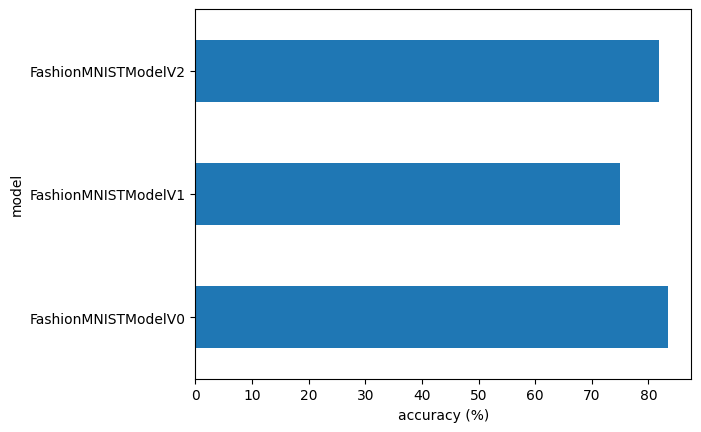

In [ ]:
# Visualize our model results
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")#for horizontal we use kind="barh"
plt.xlabel("accuracy (%)")
plt.ylabel("model");

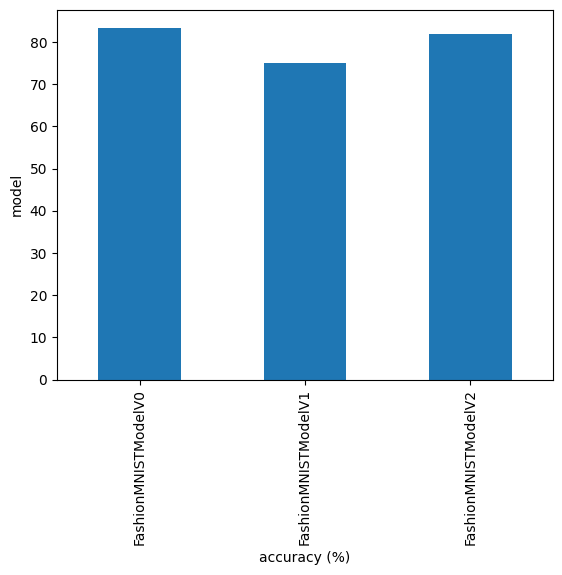

In [ ]:
# Visualize our model results
compare_results.set_index("model_name")["model_acc"].plot(kind="bar")#for vertical use kind="bar"
plt.xlabel("accuracy (%)")
plt.ylabel("model");

# Matplotlib does not work with GPU.........................

In [ ]:
## 9. Make and evaluate random predictions with best model

def make_predictions(model: torch.nn.Module,
                     data:list,
                     device: torch.device=device):

  pred_probs = []
  model.to(device)
  model.eval()

  with torch.inference_mode():
    for sample in data:
      # Prepare the sample (add a batch dimension and pass to target device)
      sample = torch.unsqueeze(sample, dim=0).to(device)

      # Forward pass (model outputs raw logits)
      pred_logit = model(sample)

      # Get prediction probability (logit--> prediction probability)
      pred_prob = torch.softmax(pred_logit.squeeze(), dim =0)

      # Get pred_prob off the GPU for further calculations
      pred_probs.append(pred_prob.cpu())

  # stack the pred_probs to turn list into a tensor
  return torch.stack(pred_probs)

In [ ]:
img, label = test_data[0][:5]
img.shape, label

(torch.Size([1, 28, 28]), 9)

In [ ]:
import random
#random.seed(42)

test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

# View the first sample
test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Bag')

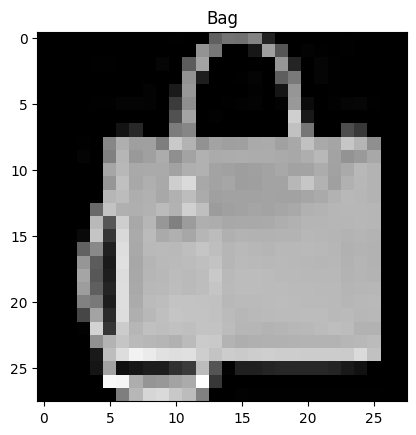

In [ ]:
plt.imshow(test_samples[0].squeeze(), cmap="gray")
plt.title(class_names[test_labels[0]])


> Note: There are two main agreed upon ways for representing images in machine learning:

>Color channels first: [color_channels, height, width] (CHW) -> PyTorch default (as of April 2022)
Color channels last: [height, width, color_channels] (HWC) -> Matplotlib/TensorFlow default (as of April 2022)

In [1]:

# Get the class names from the dataset
class_names = train_data.classes
class_names


NameError: name 'train_data' is not defined

In [ ]:
# Make predictions

pred_probs = make_predictions(model= model_2,
                              data= test_samples)

# View first two prediction probabilities
pred_probs[:2]

tensor([[3.6030e-04, 3.6030e-04, 3.6030e-04, 3.6030e-04, 3.6030e-04, 3.6030e-04,
         3.6030e-04, 3.6030e-04, 9.9676e-01, 3.6030e-04],
        [3.5670e-01, 7.1378e-03, 7.1378e-03, 5.0616e-01, 7.1378e-03, 7.1378e-03,
         8.7176e-02, 7.1378e-03, 7.1378e-03, 7.1378e-03]])

In [ ]:
# Convert predcition probabilities to labels

pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([8, 3, 2, 9, 8, 8, 0, 6, 6])

In [ ]:
test_labels

[8, 3, 2, 9, 8, 8, 0, 6, 4]

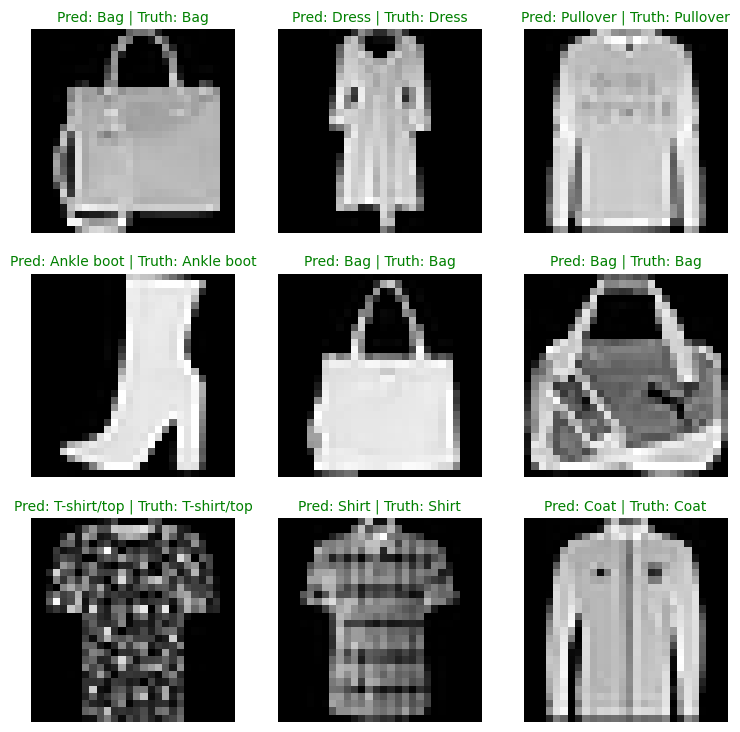

In [ ]:
# Plot predictions
plt.figure(figsize=(9,9))
nrows=3
ncols=3

for i, sample in enumerate(test_samples):
  # Create subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the targets image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction (in text form, e.g. "Sandal")
  pred_label = class_names[pred_classes[i]]

  # Get the truth label(in text form)
  truth_label = class_names[test_labels[i]]

  # Create a title for the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality between pred and truth and change color of title text
  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c="g") # Green text if prediction same as truth
  else:
    plt.title(title_text, fontsize=10, c="r")

  plt.axis(False)


## 10. Making a confusion matrix for further prediction evaluation.

A confusion matrix is a fantastic way of evaluating your classification model visually: https://www.learnpytorch.io/02_pytorch_classification/#9-more-classification-evaluation-metrics

1. Make predictions with our trained model on the test dataset.
2. Make a confusion matrix `torchmetrics.ConfusionMatrix`: https://lightning.ai/docs/torchmetrics/stable/classification/confusion_matrix.html
3. Plot the confusion matrix using `mlxtend.plotting.plot_confusion_matrix()`- https://rasbt.github.io/mlxtend/user_guide/plotting/plot_confusion_matrix/

In [ ]:
# Import tqdm.auto
from tqdm.auto import tqdm



# 1. Make predictions with trained model
y_preds= []
model_2.eval()
with torch.inference_mode():
  for X,y in tqdm(test_dataloader, desc="Making predictions"):
    # Send the data and target to target device
    X,y =X.to(device), y.to(device)

    # Do the forward pass
    y_logit = model_2(X)

    # Turn predictions from logits-> prediction probabilities-> prediction labels
    y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)

    # Put prediction on CPU for evaluation
    y_preds.append(y_pred.cpu())

# Concatenate list of predictions into a tensor
#print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor

Making predictions:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 4, 4,  ..., 8, 1, 4])

In [ ]:
len(y_pred_tensor)

10000

In [ ]:
# See if required packages are installed and if not, install them...

try:
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__} ")
  assert int(mlxtend.__version__.split(".")[1])>=19, "mlxtend version should be 0.19.0 or higher"

except:
  !pip install -q torchmetrics -U mlxtend
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 51.4 MB/s eta 0:00:00
mlxtend version: 0.23.1


In [ ]:
# Import mlxtend upgraded version
import mlxtend
print(mlxtend.__version__)
assert int(mlxtend.__version__.split(".")[1]) >= 19 # should be version 0.19.0 or higher

0.23.1


In [ ]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
y_pred_tensor[:10]

tensor([9, 4, 4, 1, 6, 4, 4, 6, 4, 7])

In [ ]:
test_data.targets

tensor([9, 2, 1,  ..., 8, 1, 5])

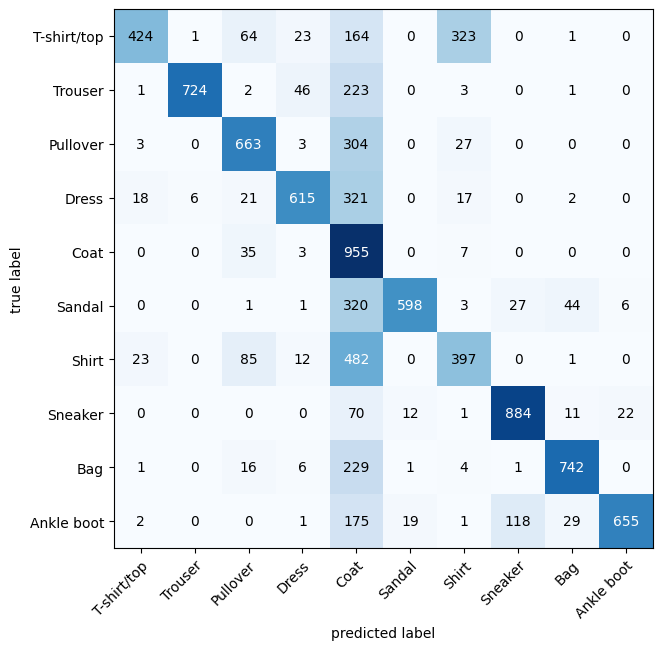

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with NumPy
    class_names=class_names, # turn the row and column labels into class names
    figsize=(10, 7)
);

## 11. Save and load best performing model:
 https://www.learnpytorch.io/01_pytorch_workflow/#5-saving-and-loading-a-pytorch-model

In [ ]:
from pathlib import Path

# Create model directory path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)

# Create model save
MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"

MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME
MODEL_SAVE_PATH

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),
           f= MODEL_SAVE_PATH)

Saving model to: models/03_pytorch_computer_vision_model_2.pth


In [ ]:
model_2.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[ 0.1929,  0.2038, -0.1290],
                        [ 0.3447,  0.0783,  0.2861],
                        [-0.3663,  0.0890,  0.3230]]],
              
              
                      [[[-0.3390,  0.3764, -0.0252],
                        [ 0.3281,  0.3647, -0.1194],
                        [ 0.0836,  0.4483, -0.2065]]],
              
              
                      [[[-0.4085,  0.2045,  0.1187],
                        [-0.9932, -0.5360,  0.4162],
                        [-0.9400, -0.5320, -0.0061]]],
              
              
                      [[[-0.6008, -0.9182, -0.3607],
                        [ 0.2092, -0.5550,  0.3551],
                        [ 0.3805,  0.0094,  0.3809]]],
              
              
                      [[[ 0.0441,  0.1392,  0.0041],
                        [-0.0591,  0.1667, -0.1676],
                        [ 0.1795,  0.3950,  0.0123]]],
              
              
      

In [ ]:
test_image.shape

torch.Size([3, 64, 64])

In [ ]:
# Create a new instance
torch.manual_seed(42)

loaded_model_2 = FashionMNISTModelV2(input_shape=1,hidden_units=10,output_shape=len(class_names))
# Load in the save state_dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Send the model to the target device
loaded_model_2.to(device)

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
    (2): ReLU()
  )
)

In [ ]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.5387954115867615,
 'model_acc': 81.84904153354633}

In [ ]:
# Evaluate loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model = loaded_model_2,
    data_loader = test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn = accuracy_fn

)
loaded_model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.5387954115867615,
 'model_acc': 81.84904153354633}

In [ ]:
# Check if model results are close to each other

torch.isclose(torch.tensor(model_2_results["model_loss"]),torch.tensor(loaded_model_2_results["model_loss"]), atol=1e-08)

tensor(True)